# Bonus: Temperature Analysis I

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from datetime import datetime as dt
import numpy as np

In [3]:
# "tobs" is "temperature observations"
df = pd.read_csv('Resources/hawaii_measurements.csv')
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [4]:
# Convert the date column format from string to datetime
df['date']=pd.to_datetime(df['date'])
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [5]:
# Set the date column as the DataFrame index
# df=df.set_index('date')
# df.head()

#### I tried to set the date columm as index but it caused me many problems while trying to filter the information by specific months, therefore I chose to leave the date column as is.

In [6]:
# Drop the date column

### Compare June and December data across all years 

In [7]:
from scipy import stats

#### Created data frames for the months of June and December

In [8]:
# Filter data for desired months

june_df = df[df['date'].dt.month == 6]
june_df_dropped = june_df.dropna() #drop NaN values in dataframe
june_df_dropped.head(30)
jun_obs_num = len(june_df_dropped['tobs'])
print(f'There are {jun_obs_num} observation for the month of June.')

There are 1574 observation for the month of June.


In [9]:
dec_df = df[df['date'].dt.month == 12]
dec_df_dropped = dec_df.dropna() #drop NaN values in dataframe
dec_df_dropped.head(30)
dec_obs_num = len(dec_df_dropped['tobs'])
print(f'There are {dec_obs_num} observation for the month of December.')

There are 1405 observation for the month of December.


In [10]:
from icecream import ic
# Identify the average temperature for June
avg_june = june_df_dropped['tobs'].mean()
# ic(round(avg_june,2))
print(f'The average temperature for June is {round(avg_june,2)}ºF.')


The average temperature for June is 74.89ºF.


In [11]:
# Identify the average temperature for December
avg_dec = dec_df_dropped['tobs'].mean()
# ic(round(avg_dec,2))
print(f'The average temperature for December is {round(avg_dec,2)}ºF.')

The average temperature for December is 70.93ºF.


#### Created lists for the temperature observations for both June and December

In [24]:
# Create collections of temperature data
june = june_df_dropped['tobs'].to_list()

dec = dec_df_dropped['tobs'].to_list()
june_n = len(june)
dec_n = len(dec)
# ic(june_n, dec_n)

In [25]:
# normality test

print(f'June normality test: {stats.shapiro(june)}')
print(f'December normality test: {stats.shapiro(dec)}')

June normality test: ShapiroResult(statistic=0.9833921790122986, pvalue=1.6506709193953029e-12)
December normality test: ShapiroResult(statistic=0.9817761778831482, pvalue=2.471981820628688e-12)


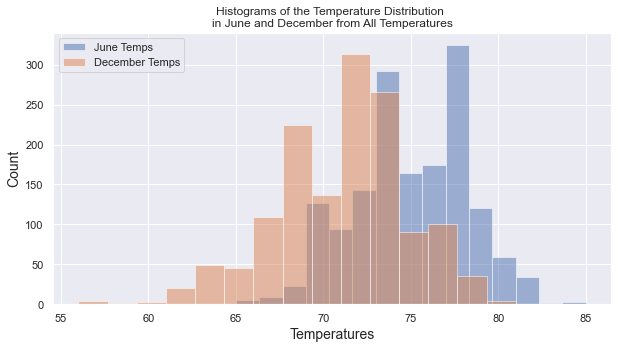

In [59]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.set(style="darkgrid")
sb.set_theme()

plt.figure(figsize=(10,5))
plt.hist(june, bins=15, alpha=0.5, label="June Temps")
# sb.histplot(dec, bins=15, label="December Temps")
plt.hist(dec, bins=15, alpha=0.5, label="December Temps")
plt.xlabel("Temperatures", size=14)
plt.ylabel("Count", size=14)
plt.title("Histograms of the Temperature Distribution \nin June and December from All Temperatures")
plt.legend(loc='upper left')

plt.show()

#### The histograms show the data is a bit skewed but the distributions overlap. Since the variable is continuous and the samples are paired (different time of the year temperature same place), we can do a paired t-test.

In [31]:
# paired t-test
import random
t, p = stats.ttest_rel(random.sample(june,1400), random.sample(dec,1400))
t, p
print(f'T-stat: {t}.')
print(f'P-value: {p}.')
print(f'Interpretation: Small P-value indicates difference of the means is statistically significance.')

T-stat: 30.025955235954193.
P-value: 2.6857917669925086e-153.
Interpretation: Small P-value indicates difference of the means is statistically significance.


#### Just to understand how the data process would work on an unpaired t test, I did the equations below assuming first determining if the two sample sets had equal variance and then performing the statistical analysis.

In [38]:
#unpaired t-test
from scipy.stats import levene

#perform test for equal variance
stat, p = levene(june, dec)
p = round(p, 4)
print(p)
jun_var = np.var(june)
dec_var = np.var(dec)
print(jun_var)
print(dec_var)

0.0007
10.604524221453287
14.022665558302325


In [42]:
stats.ttest_ind(june, dec, equal_var=False)

Ttest_indResult(statistic=31.355036920962423, pvalue=4.193529835915755e-187)

### Analysis